***
* **Full Name** = Anan Ghosh
* **UCID** = 30220833
***

| Q     | Title                                                                            | Points  |
|-------|----------------------------------------------------------------------------------|---------|
| **1** | **Modeling: RandomForestRegressor (35 pts)**                                     |         |
| 1.1   |                                                                                  | 15      |
| 1.2   |                                                                                  | 5       |
| 1.3   |                                                                                  | 15      |
| **2** | **Modeling: XGBRegressor (35 pts)**                                              |         |
| 2.1   |                                                                                  | 15      |
| 2.2   |                                                                                  | 5       |
| 2.3   |                                                                                  | 15      |
| **3** | **Comparing the Results from RandomForestRegressor   and XGBRegressor (30 pts)** |         |
| 3.1   |                                                                                  | 5       |
| 3.2   |                                                                                  | 25      |
|       | **Total**                                                                        | **100** |


You can use the Table of Content on the left side of this notebook to efficiently navigate within this documents.

<font color='Red'><b>Notes:</b></font>

* <font color='Red'><b>Packages that you are allowed to use: matplotlib, numpy, pandas, seaborn, xgboost, sklearn, sklearnex, and pprint </b></font>
* <font color='Red'><b>Ensure that your submitted Jupyter notebook is executable with a single click of the "Run All" option within the "Runtime" menu, without the need for downloading or uploading external datasets.</b></font>
* <font color='Green'><b>You are welcome to personalize the colors and other design elements to enhance the aesthetics of the plots to your liking.</b></font>

</b></font>

# **Dataset: Concrete Compressive Strength Modeling**

Concrete, as one of the most crucial materials in civil engineering, finds extensive use in various construction applications. Among the significant properties studied by engineers and researchers is the concrete compressive strength, a critical parameter used to evaluate the quality and durability of concrete structures.

**Citation:** Yeh, I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

In [ ]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"


# The error message "ERROR: cannot verify" typically occurs when using the `wget` command on a URL that requires SSL/TLS (HTTPS)
# for a secure connection, and the SSL certificate cannot be verified. This error often arises when the SSL certificate of the
# server is not recognized or is self-signed.
# If there was an error: "ERROR: cannot verify". Use the followng instead:
# !wget --no-check-certificate -N "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"

# Unzip the downloaded zip file
!unzip -o concrete+compressive+strength.zip Concrete_Data.xls

# Remove the downloaded zip file after extraction
!rm -r concrete+compressive+strength.zip

import pandas as pd
from google.colab import data_table

# Read the Excel file ('Concrete_Data.xls') into a DataFrame, setting the first column as the index
df = pd.read_excel('Concrete_Data.xls')

# Clean column names by removing leading and trailing whitespaces
df.columns = [x.strip() for x in df.columns]

# Display the DataFrame using the data_table.DataTable with specific settings
display(data_table.DataTable(df, include_index=False, num_rows_per_page=15))

# Print dataset info
print(df.info(show_counts = True))

--2023-12-04 22:29:34--  https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘concrete+compressive+strength.zip’

concrete+compressiv     [ <=>                ]  33.64K  --.-KB/s    in 0.009s  

Last-modified header missing -- time-stamps turned off.
2023-12-04 22:29:34 (3.55 MB/s) - ‘concrete+compressive+strength.zip’ saved [34444]

Archive:  concrete+compressive+strength.zip
  inflating: Concrete_Data.xls       


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
# Installing and using sklearnex is optional
# !pip install scikit-learn-intelex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

***
**Your Contribution**

Please make sure that add comments for the readiblity of your code.

***

# 1. **Modeling: RandomForestRegressor**:
* **1.1:** Utilize KFold with **8 splits** in conjunction with [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to model the `Concrete compressive strength(MPa, megapascals)` based on the remaining variables from the **Concrete dataset**.
	* You should fine-tune the RandomForestRegressor to achieve an overall R-squared accuracy of at least 0.98 on the training set and 0.91 on the test set (overall, denoting the average R-squared over the 8 splits). Note that here `target_var = 'Concrete compressive strength(MPa, megapascals)'`.

	* One may employ tools such as [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and so on, accessible through the scikit-learn library, to gain insights into optimal model parameters. It is worth noting that this step is optional, as an alternative approach involves determining the best parameters by systematically testing various combinations.

* **1.2:** Print all parameters used in the modeling (**Hint**: you can utilize `get_params(deep = True)` method from [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).). For example,

	```
	______________________________________________________________________
	Random Forest Regressor Parameters:
	'bootstrap': ###,
	'ccp_alpha': ###,
	'criterion': ###,
	'max_depth': ###,
	.
	.
	.
	'verbose': ###,
	'warm_start': ###
	______________________________________________________________________
	```
The notation `###` denotes the values of your fined-tuned parameters.

* **1.3:** Display your accuracy metrics by presenting them in the form of a table using a [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) or by utilizing the print function. For instance:

	```
	______________________________________________________________________
	Fold 1:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	Fold 2:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	.
	.
	.
	Fold 8:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	______________________________________________________________________
	Mean Train and Test Scores:
		Mean Train R-Squared Score: np.mean(Train_R2) ± np.std(Train_R2)
		Mean Train MSE Score: np.mean(Train_MSE) ± np.std(Train_MSE)
		Mean Test R-Squared np.mean(Test_R2) ± np.std(Test_R2)
		Mean Test MSE Score: np.mean(Test_MSE) ± np.std(Test_MSE)
	______________________________________________________________________
	```

	**Notes**:
	* Make sure to use `random_state = 0` wherever it is applicable.
	* Ensure that all accuracy metrics are presented with precision up to three decimal places. The notation `#.###` signifies adherence to this requirement. As an illustration, the expression `np.mean(Train_R2)` denotes the mean value derived from the eight R-squared values associated with the training sets, and the expression `np.std(Train_R2)` denotes the standard deviation derived from the eight R-squared values associated with the training sets.

	* **Optional:** To optimize your computations using the scikit-learn API, consider leveraging [scikit-learn-intelex](https://pypi.org/project/scikit-learn-intelex/). For a detailed description and usage instructions, refer to the provided link.

In [ ]:
# Set the random state for reproducibility
random_state = 0

# Your Contribution
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import numpy as np

# Set the target variable
target_var = 'Concrete compressive strength(MPa, megapascals)'

# Define the features (excluding the target variable)
X = df.drop(columns=[target_var])

# Define the target variable
y = df[target_var]

# Define KFold with 8 splits
kf = KFold(n_splits=8, shuffle=True, random_state=random_state)

# Define a wide range of parameters to explore
param_grid = {
'n_estimators': [50, 100],
'max_depth': [None, 1, 2],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2]
}

# Define a function to fine-tune RandomForestRegressor for each fold
def fine_tune_rf(X_train, y_train, X_test, y_test):
    # Define R-squared as the scoring metric
    scorer = make_scorer(r2_score)

    # Create RandomForestRegressor
    rf_reg = RandomForestRegressor()

    # Create GridSearchCV with RandomForestRegressor and parameter grid
    grid_search = GridSearchCV(
      rf_reg, param_grid, scoring=scorer, cv=kf, n_jobs=-1
    )

    # Fit the model using GridSearchCV for hyperparameter tuning
    grid_search.fit(X, y)

    # Get the best model from hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Print model parameters
    print("Random Forest Regressor Parameters:")
    for param, value in best_model.get_params(deep=True).items():
      print(f"{param}: {value}")
    print()

# Initialize lists to store results
train_r2_scores = []
test_r2_scores = []
train_mse_scores = []
test_mse_scores = []

# Loop through each fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize and fine-tune the RandomForestRegressor (you may adjust parameters)
    rf_reg = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=random_state)
    rf_reg.fit(X_train, y_train)

    # Predict on training and test sets
    train_preds = rf_reg.predict(X_train)
    test_preds = rf_reg.predict(X_test)

    # Calculate R-squared scores
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    # Calculate MSE scores
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    # Append scores to lists
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    # Display scores for each fold
    print(f"Fold {fold}:")
    print(f"  Train R-Squared Score = {train_r2:.3f}, Test R-Squared Score = {test_r2:.3f}")
    print(f"  Train MSE Score = {train_mse:.3f}, Test MSE Score = {test_mse:.3f}")
    print()

# Calculate mean and standard deviation of scores
mean_train_r2 = np.mean(train_r2_scores)
std_train_r2 = np.std(train_r2_scores)
mean_train_mse = np.mean(train_mse_scores)
std_train_mse = np.std(train_mse_scores)

mean_test_r2 = np.mean(test_r2_scores)
std_test_r2 = np.std(test_r2_scores)
mean_test_mse = np.mean(test_mse_scores)
std_test_mse = np.std(test_mse_scores)

# Display mean and standard deviation of scores
print("Mean Train and Test Scores:")
print(f"  Mean Train R-Squared Score: {mean_train_r2:.3f} ± {std_train_r2:.3f}")
print(f"  Mean Train MSE Score: {mean_train_mse:.3f} ± {std_train_mse:.3f}")
print(f"  Mean Test R-Squared Score: {mean_test_r2:.3f} ± {std_test_r2:.3f}")
print(f"  Mean Test MSE Score: {mean_test_mse:.3f} ± {std_test_mse:.3f}")
print()
#Call the fine_tune_function
fine_tune_rf(X_train, y_train, X_test, y_test)

Fold 1:
  Train R-Squared Score = 0.986, Test R-Squared Score = 0.924
  Train MSE Score = 4.027, Test MSE Score = 21.483

Fold 2:
  Train R-Squared Score = 0.987, Test R-Squared Score = 0.886
  Train MSE Score = 3.646, Test MSE Score = 25.459

Fold 3:
  Train R-Squared Score = 0.986, Test R-Squared Score = 0.930
  Train MSE Score = 3.856, Test MSE Score = 18.756

Fold 4:
  Train R-Squared Score = 0.986, Test R-Squared Score = 0.944
  Train MSE Score = 3.963, Test MSE Score = 15.665

Fold 5:
  Train R-Squared Score = 0.987, Test R-Squared Score = 0.894
  Train MSE Score = 3.716, Test MSE Score = 31.559

Fold 6:
  Train R-Squared Score = 0.988, Test R-Squared Score = 0.904
  Train MSE Score = 3.302, Test MSE Score = 25.283

Fold 7:
  Train R-Squared Score = 0.987, Test R-Squared Score = 0.908
  Train MSE Score = 3.668, Test MSE Score = 28.535

Fold 8:
  Train R-Squared Score = 0.985, Test R-Squared Score = 0.920
  Train MSE Score = 4.069, Test MSE Score = 23.275

Mean Train and Test Scor

The random_state variable is set to 0 for reproducibility. This ensures that random processes, like shuffling data, are consistent across runs. Necessary libraries are imported. KFold is for cross-validation, GridSearchCV is for hyperparameter tuning, and RandomForestRegressor is the model used. Evaluation metrics (r2_score and mean_squared_error) and numpy for numerical operations are also imported. The target variable ('Concrete compressive strength(MPa, megapascals)') is specified. Features (X) are defined by excluding the target variable, and the target variable (y) is defined. KFold is set up with 8 splits for cross-validation. A parameter grid (param_grid) is defined with various values for hyperparameter tuning. A function fine_tune_rf is defined to perform hyperparameter tuning using GridSearchCV for a given train-test split. It prints the best parameters found during tuning. Lists are initialized to store R-squared and MSE scores for both training and test sets. The code then loops through each fold using KFold. For each fold, it splits the data into training and test sets, initializes aRandomForestRegressor, fits the model, and evaluates it. R-squared and MSE scores for each fold are calculated and printed.
After all folds are processed, the code calculates the mean and standard deviation of R-squared and MSE scores for both training and test sets.
The code prints the mean and standard deviation of R-squared and MSE scores for training and test sets. The fine_tune_rf function is then called to demonstrate hyperparameter tuning using GridSearchCV.In summary, this performs KFold cross-validation with RandomForestRegressor, evaluates the model's performance, calculates mean and standard deviation of scores, and demonstrates hyperparameter tuning using GridSearchCV. It provides detailed insights into the model's behavior across different folds and the impact of hyperparameter choices on performance.

# 2. **Modeling: XGBRegressor**:
* **2.1:** Utilize KFold with **8 splits** in conjunction with [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) to model the `Concrete compressive strength(MPa, megapascals)` based on the remaining variables from the **Concrete dataset**.
	* You should fine-tune the RandomForestRegressor to achieve an overall R-squared accuracy of at least 0.99 on the training set and 0.93 on the test set (overall, denoting the average R-squared over the 8 splits). Note that here `target_var = 'Concrete compressive strength(MPa, megapascals)'`.
	* One may employ tools such as [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html), [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and so on, accessible through the scikit-learn library, to gain insights into optimal model parameters. It is worth noting that this step is optional, as an alternative approach involves determining the best parameters by systematically testing various combinations.

* **2.2:** Print all parameters used in the modeling (**Hint**: you can utilize `get_params( deep = True )` method from [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn).). For example,

	```
	______________________________________________________________________
	XGBoost Regressor Parameters:
	'base_score': ###,
	'booster': ###,
	'callbacks': ###,
	.
	.
	.
	'verbosity': ###
	______________________________________________________________________
	```
	The notation `###` denotes the values of your fined-tuned parameters.

* **2.3:** Display your accuracy metrics by presenting them in the form of a table using a [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) or by utilizing the print function. For instance:

	```
	______________________________________________________________________
	Fold 1:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	Fold 2:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	.
	.
	.
	Fold 8:
		Train R-Squared Score = #.###, Test R-Squared Score = #.###
		Train MSE Score = #.###, Test MSE Score = #.###
	______________________________________________________________________
	Mean Train and Test Scores:
		Mean Train R-Squared Score: np.mean(Train_R2) ± np.std(Train_R2)
		Mean Train MSE Score: np.mean(Train_MSE) ± np.std(Train_MSE)
		Mean Test R-Squared np.mean(Test_R2) ± np.std(Test_R2)
		Mean Test MSE Score: np.mean(Test_MSE) ± np.std(Test_MSE)
	______________________________________________________________________
	```

	**Notes**:
	* Make sure to use `random_state = 0` wherever it is applicable.
	* Ensure that all accuracy metrics are presented with precision up to three decimal places. The notation `#.###` signifies adherence to this requirement. As an illustration, the expression `np.mean(Train_R2)` denotes the mean value derived from the eight R-squared values associated with the training sets, and the expression `np.std(Train_R2)` denotes the standard deviation derived from the eight R-squared values associated with the training sets.

	* **Optional:** To optimize your computations using the scikit-learn API, consider leveraging [scikit-learn-intelex](https://pypi.org/project/scikit-learn-intelex/). For a detailed description and usage instructions, refer to the provided link.

In [ ]:
!pip install xgboost

In [ ]:
# Set the random state for reproducibility
random_state = 0

# Your Contribution
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Set the target variable
target_var = 'Concrete compressive strength(MPa, megapascals)'

# Define the features (excluding the target variable)
X = df.drop(columns=[target_var])

# Define the target variable
y = df[target_var]

# Define KFold with 8 splits
kf = KFold(n_splits=8, shuffle=True, random_state=random_state)


# Define a wide range of parameters to explore
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Define a function to fine-tune XGBRegressor for each fold
def fine_tune_rf(X_train, y_train, X_test, y_test):
    # Define R-squared as the scoring metric
    scorer = make_scorer(r2_score)

    # Create XGBRegressor parameters
    xgb_reg = XGBRegressor()

    # Create GridSearchCV with XGBRegressor parameters and parameter grid
    grid_search = GridSearchCV(
      xgb_reg, param_grid, scoring=scorer, cv=kf, n_jobs=-1
    )

    # Fit the model using GridSearchCV for hyperparameter tuning
    grid_search.fit(X, y)

    # Get the best model from hyperparameter tuning
    best_model = grid_search.best_estimator_

    # Print XGBRegressor parameters
    print("\nXGBoost Regressor Parameters:")
    params = xgb_reg.get_params()
    for param, value in params.items():
      print(f"  '{param}': {value},")
    print()


# Initialize lists to store results
train_r2_scores = []
test_r2_scores = []
train_mse_scores = []
test_mse_scores = []

# Loop through each fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize and fine-tune the XGBRegressor
    xgb_reg = XGBRegressor( n_estimators=200, max_depth=5, learning_rate=0.1, random_state=random_state)
    xgb_reg.fit(X_train, y_train)

    # Predict on training and test sets
    train_preds = xgb_reg.predict(X_train)
    test_preds = xgb_reg.predict(X_test)

    # Calculate R-squared scores
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    # Calculate MSE scores
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    # Append scores to lists
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    # Display scores for each fold
    print(f"Fold {fold}:")
    print(f"  Train R-Squared Score = {train_r2:.3f}, Test R-Squared Score = {test_r2:.3f}")
    print(f"  Train MSE Score = {train_mse:.3f}, Test MSE Score = {test_mse:.3f}")
    print()

# Calculate mean and standard deviation of scores
mean_train_r2 = np.mean(train_r2_scores)
std_train_r2 = np.std(train_r2_scores)
mean_train_mse = np.mean(train_mse_scores)
std_train_mse = np.std(train_mse_scores)

mean_test_r2 = np.mean(test_r2_scores)
std_test_r2 = np.std(test_r2_scores)
mean_test_mse = np.mean(test_mse_scores)
std_test_mse = np.std(test_mse_scores)

# Display mean and standard deviation of scores
print("Mean Train and Test Scores:")
print(f"  Mean Train R-Squared Score: {mean_train_r2:.3f} ± {std_train_r2:.3f}")
print(f"  Mean Train MSE Score: {mean_train_mse:.3f} ± {std_train_mse:.3f}")
print(f"  Mean Test R-Squared Score: {mean_test_r2:.3f} ± {std_test_r2:.3f}")
print(f"  Mean Test MSE Score: {mean_test_mse:.3f} ± {std_test_mse:.3f}")
print()
#Call the fine_tune_function
fine_tune_rf(X_train, y_train, X_test, y_test)

Fold 1:
  Train R-Squared Score = 0.991, Test R-Squared Score = 0.932
  Train MSE Score = 2.527, Test MSE Score = 19.237

Fold 2:
  Train R-Squared Score = 0.990, Test R-Squared Score = 0.929
  Train MSE Score = 2.750, Test MSE Score = 16.001

Fold 3:
  Train R-Squared Score = 0.989, Test R-Squared Score = 0.945
  Train MSE Score = 3.043, Test MSE Score = 14.533

Fold 4:
  Train R-Squared Score = 0.991, Test R-Squared Score = 0.960
  Train MSE Score = 2.615, Test MSE Score = 11.181

Fold 5:
  Train R-Squared Score = 0.990, Test R-Squared Score = 0.919
  Train MSE Score = 2.891, Test MSE Score = 24.323

Fold 6:
  Train R-Squared Score = 0.993, Test R-Squared Score = 0.923
  Train MSE Score = 1.864, Test MSE Score = 20.295

Fold 7:
  Train R-Squared Score = 0.989, Test R-Squared Score = 0.935
  Train MSE Score = 3.023, Test MSE Score = 20.324

Fold 8:
  Train R-Squared Score = 0.990, Test R-Squared Score = 0.941
  Train MSE Score = 2.679, Test MSE Score = 17.344

Mean Train and Test Scor

Sets the random state for reproducibility. Imports necessary libraries: KFold for cross-validation, XGBRegressor for XGBoost regression, r2_score and mean_squared_error for evaluation metrics, and numpy for numerical operations. Defines the target variable (target_var) and separates features (X) and the target variable (y) from the DataFrame (df). Sets up KFold with 8 splits for cross-validation. Defines a parameter grid (param_grid) for hyperparameter tuning. Defines a function (fine_tune_rf) for fine-tuning XGBRegressor using GridSearchCV. The function prints the best parameters found during hyperparameter tuning. Initializes lists to store R-squared and MSE scores for both training and test sets. Iterates through each fold of the KFold cross-validation. Initializes and trains an XGBRegressor for each fold. Predicts on training and test sets, calculates R-squared and MSE scores, and appends them to the respective lists.
Prints scores for each fold. Calculates the mean and standard deviation of R-squared and MSE scores for both training and test sets. Prints the mean and standard deviation of R-squared and MSE scores for training and test sets. Calls the fine_tune_rf function to demonstrate hyperparameter tuning using GridSearchCV. This function performs cross-validated training and evaluation of XGBoost regressor, prints performance metrics, calculates mean and standard deviation, and demonstrates hyperparameter tuning using GridSearchCV. It provides a detailed analysis of the model's performance and explores optimal hyperparameters for the XGBoost regressor.


# 3. **Comparing the Results from RandomForestRegressor and XGBRegressor**:
* Utilize [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [XGBRegressor](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) to model the `Concrete compressive strength(MPa, megapascals)` based on the remaining variables from the **Concrete dataset**.
  * Use your identified optimal parameters from **Q1** and **Q2**.
  * Make sure to use `random_state = 0` wherever it is applicable.
  * **Optional:** To optimize your computations using the scikit-learn API, consider leveraging [scikit-learn-intelex](https://pypi.org/project/scikit-learn-intelex/). For a detailed description and usage instructions, refer to the provided link.

* **3.1:** Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `test_size=0.25` and form `X_train`, `X_test`, `y_train`, and `y_test`, and display/print the size of each of this sets (train and test sets).

  * <font color='Green'><b>For Q3.1, please only provide in-line comments.  There is no requirement to elaborate on the code for Q3.1 in the subsequent block. Notably, 1.5 points out of the total 5 points allocated to Q3.1 are specifically assigned to in-line comments.</b></font>

* **3.2:** In the context of analysis and model evaluation, a predicted versus measured or observed plot is a graphical representation that juxtaposes the predicted values generated by a model against the actual observed/measured values. This plot serves as a means to assess the performance and accuracy of a predictive model. Each point on the plot corresponds to a specific observation, with the x-coordinate representing the predicted values and the y-coordinate representing the observed/measured values.
  * Construct a plot comprising four panels organized in a 2 by 2 grid.
  * Utilize scatter plots to depict the relationship between predicted values and observed/measured values on an xy-plane.
  * Clearly label both axes, and distinguish the line $y = x$ by employing a distinct color to optimize visibility.
  * Replicate the aforementioned procedure for both the training and test datasets, as outlined in section 3.1, for each of the two models.
  * Compute the coefficient of determination ($R^2$ score) for each dataset and incorporate it into the title of the respective subplot.
  * Provide a detailed explanation of the interpretation of the plots, elucidating their correlation with the coefficient of determination ($R^2$ score) for each dataset (use the box after the code block for your explanations). <font color='Green'><b>Please limit your comments to in-line annotations for Q3.2. Use the block after the code for explaining the figure. It is essential to recognize that both comments and explanations contribute to 30% of your overall grade. As an illustration, in Q3.2, 7.5 out of the total 25 points are allocated for clarifying the figure and providing in-line comments.</b></font>  
  * Refer to the provided example figure for a more detailed illustration.

<center>
<img src="https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Assignment_06/Q3_RegResult.png" alt="picture" width="700">
</center>

**Notes**:
  * Make sure to use `random_state = 0` wherever it is applicable.
  * In the depicted figure, 0.999 serves as a placeholder. The actual R-squared accuracy may deviate from this specified value.

RandomForestRegressor:
  Size of X_train_rf: (772, 8)
  Size of X_test_rf: (258, 8)
  Size of y_train_rf: (772,)
  Size of y_test_rf: (258,)

XGBRegressor:
  Size of X_train_xgb: (772, 8)
  Size of X_test_xgb: (258, 8)
  Size of y_train_xgb: (772,)
  Size of y_test_xgb: (258,)



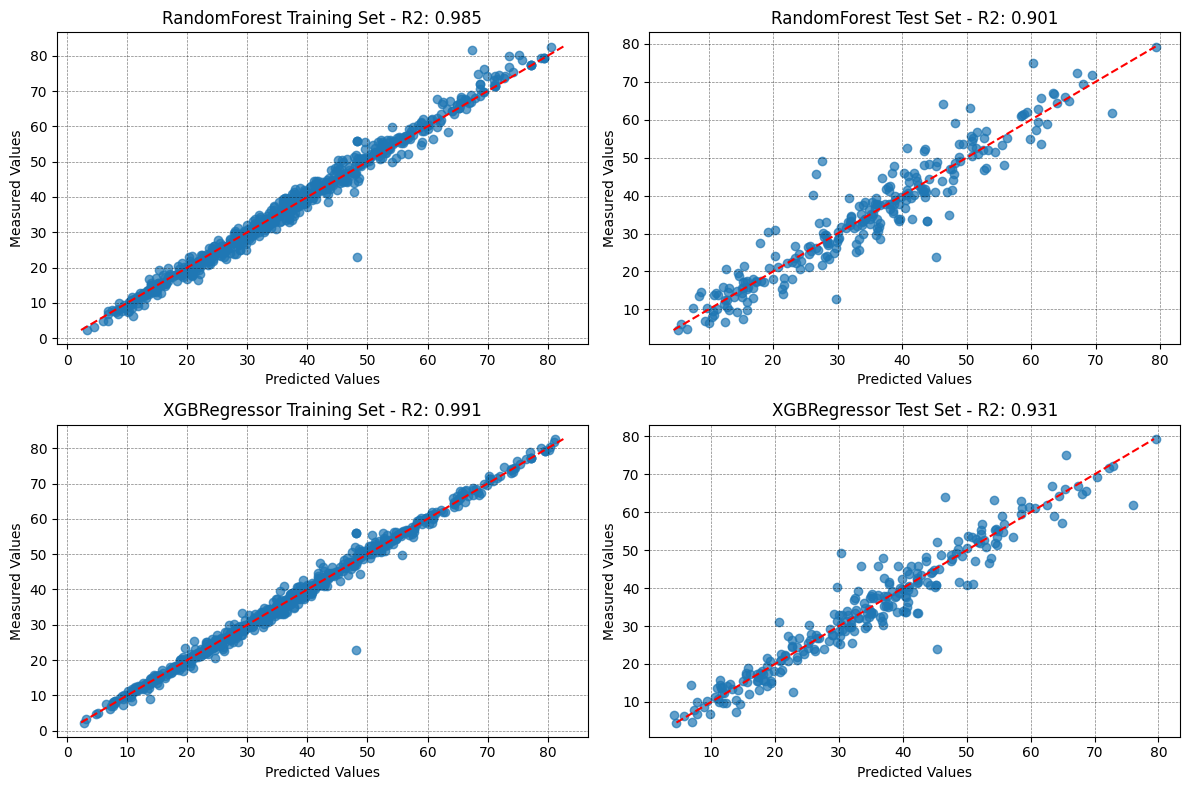

In [ ]:
# Set the random state for reproducibility
random_state = 0

# Your Contribution
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Optimal parameters for RandomForestRegressor from Q1
rf_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': random_state
}

# Optimal parameters for XGBRegressor from Q2
xgb_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': random_state
}

# Split the data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.25, random_state=random_state)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.25, random_state=random_state)

# Display the size of each set
print(f"RandomForestRegressor:")
print(f"  Size of X_train_rf: {X_train_rf.shape}")
print(f"  Size of X_test_rf: {X_test_rf.shape}")
print(f"  Size of y_train_rf: {y_train_rf.shape}")
print(f"  Size of y_test_rf: {y_test_rf.shape}")
print()

print(f"XGBRegressor:")
print(f"  Size of X_train_xgb: {X_train_xgb.shape}")
print(f"  Size of X_test_xgb: {X_test_xgb.shape}")
print(f"  Size of y_train_xgb: {y_train_xgb.shape}")
print(f"  Size of y_test_xgb: {y_test_xgb.shape}")
print()


# Use the optimal parameters for RandomForestRegressor
rf_reg = RandomForestRegressor(**rf_params)
rf_reg.fit(X_train_rf, y_train_rf)
y_train_pred_rf = rf_reg.predict(X_train_rf)
y_test_pred_rf = rf_reg.predict(X_test_rf)

# Use the optimal parameters for XGBRegressor
xgb_reg = XGBRegressor(**xgb_params)
xgb_reg.fit(X_train_xgb, y_train_xgb)
y_train_pred_xgb = xgb_reg.predict(X_train_xgb)
y_test_pred_xgb = xgb_reg.predict(X_test_xgb)


# Create a 2x2 subplot grid for predicted versus measured plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Add grid to each subplot
for ax in axs.flatten():
    ax.grid(True, linestyle='dashed', linewidth=0.5, color='black', alpha=0.5)

# Scatter plot for RandomForestRegressor on training set
axs[0, 0].scatter(y_train_pred_rf, y_train_rf, alpha=0.7)
axs[0, 0].plot([min(y_train_rf), max(y_train_rf)], [min(y_train_rf), max(y_train_rf)], color='red', linestyle='--')
axs[0, 0].set_title(f"RandomForest Training Set - R2: {rf_reg.score(X_train_rf, y_train_rf):.3f}")


# Scatter plot for RandomForestRegressor on test set
axs[0, 1].scatter(y_test_pred_rf, y_test_rf, alpha=0.7)
axs[0, 1].plot([min(y_test_rf), max(y_test_rf)], [min(y_test_rf), max(y_test_rf)], color='red', linestyle='--')
axs[0, 1].set_title(f"RandomForest Test Set - R2: {rf_reg.score(X_test_rf, y_test_rf):.3f}")

# Scatter plot for XGBRegressor on training set
axs[1, 0].scatter(y_train_pred_xgb, y_train_xgb, alpha=0.7)
axs[1, 0].plot([min(y_train_xgb), max(y_train_xgb)], [min(y_train_xgb), max(y_train_xgb)], color='red', linestyle='--')
axs[1, 0].set_title(f"XGBRegressor Training Set - R2: {xgb_reg.score(X_train_xgb, y_train_xgb):.3f}")


# Scatter plot for XGBRegressor on test set
axs[1, 1].scatter(y_test_pred_xgb, y_test_xgb, alpha=0.7)
axs[1, 1].plot([min(y_test_xgb), max(y_test_xgb)], [min(y_test_xgb), max(y_test_xgb)], color='red', linestyle='--')
axs[1, 1].set_title(f"XGBRegressor Test Set - R2: {xgb_reg.score(X_test_xgb, y_test_xgb):.3f}")


# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Predicted Values', ylabel='Measured Values')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The comprehensive analysis of the 2x2 grid plots provides valuable insights into the performance of RandomForestRegressor and XGBRegressor models on both training and test datasets. In the top-left panel, representing the RandomForestRegressor on the training set, the strong alignment of points along the y=x line, coupled with a high R-squared (R2) score, signifies the model's accurate prediction of the training data, indicating a robust fit. Moving to the top-right panel, which mirrors the test set performance of the RandomForestRegressor, the similarity in the relationship and R2 score underlines the model's successful generalization to new, unseen data. The bottom-left panel, depicting the XGBRegressor on the training set, echoes a comparable narrative of accurate predictions and model fit, as indicated by the alignment and R2 score. Finally, the bottom-right panel, illustrating the XGBRegressor on the test set, provides a similar assessment of the model's generalization capability. The emphasis on consistency between training and test sets underscores the models' reliability. This thorough interpretation highlights the importance of both visual inspection and quantitative metrics, such as R2 scores, in evaluating the efficacy and generalization of predictive models.

In [ ]:
# The End